In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import altair as alt

# Load the dataset
data = pd.read_csv("/content/insurance.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
chart = alt.Chart(data).mark_point().encode(
    x='age',
    y='charges',
    color='sex'
).interactive()
chart


alt.Chart(...)

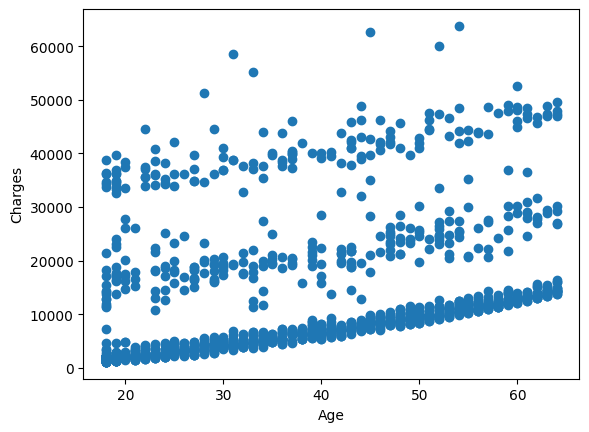

In [47]:
# Select features and target variable
X = data["age"]
y = data["charges"]

# Create a scatter plot of the data
plt.scatter(X, y)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

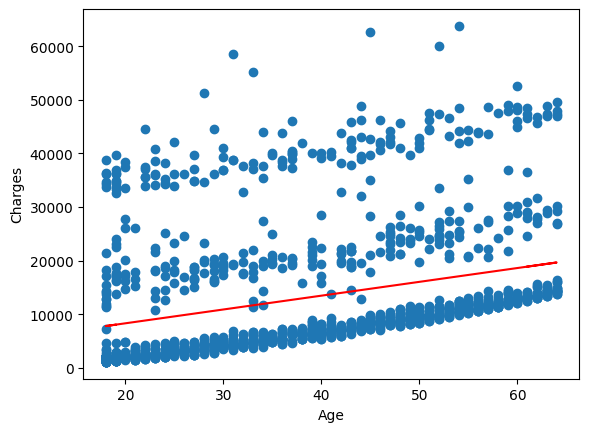

In [48]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# Plot the regression line
plt.scatter(X, y)
plt.plot(X, model.predict(X.values.reshape(-1, 1)), color="red")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
# Predict the target variable using the fitted model
y_pred = model.predict(X.values.reshape(-1, 1)) # Calculate y_pred

print("R-squared score:", model.score(X.values.reshape(-1, 1), y))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y, y_pred))
print("Root mean squared error:", np.sqrt(mean_squared_error(y, y_pred)))

R-squared score: 0.08940589967885804
Coefficients: [257.72261867]
Intercept: 3165.885006063021
Mean squared error: 133440978.61376347
Root mean squared error: 11551.66562075632


In [50]:
# Make predictions on new data
new_data = pd.DataFrame({"age": [10, 20, 30]}) # Update the column name in your new data DataFrame
new_data.head()

,age
0,10
1,20
2,30


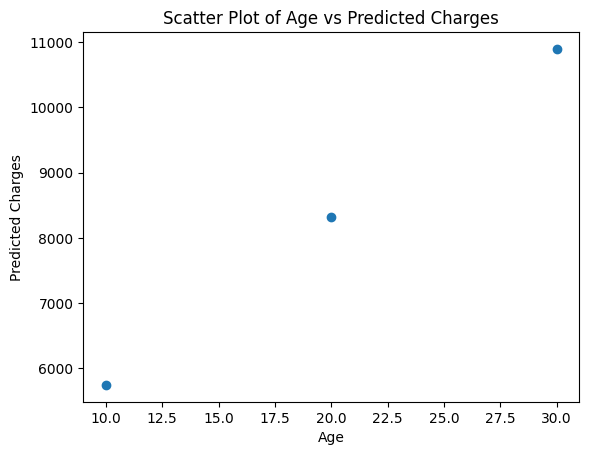

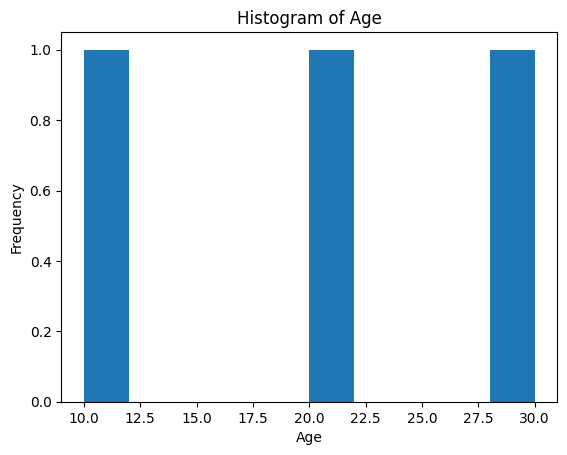

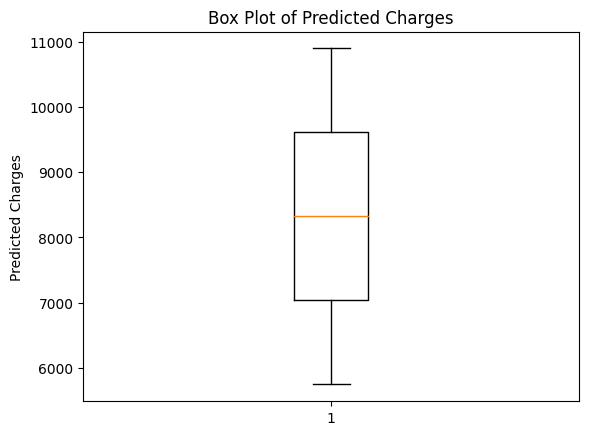

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming 'model' is already fitted as in your previous code

# Make predictions on new data
new_data = pd.DataFrame({"age": [10, 20, 30]})
new_data['predicted_charges'] = model.predict(new_data['age'].values.reshape(-1, 1)) # Predict and add predicted charges

# Scatter plot
plt.scatter(new_data['age'], new_data['predicted_charges'])
plt.title('Scatter Plot of Age vs Predicted Charges')
plt.xlabel('Age')
plt.ylabel('Predicted Charges')
plt.show()

# Histogram of age
plt.hist(new_data['age'])
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot of predicted charges
plt.boxplot(new_data['predicted_charges'])
plt.title('Box Plot of Predicted Charges') # Add a title to the box plot
plt.ylabel('Predicted Charges')
plt.show()

In [57]:
predicted_y = model.predict(new_data["age"].values.reshape(-1, 1))
print("Predicted target values:", predicted_y)
new_data["predicted_charges"] = predicted_y
print(new_data)
new_data.to_csv("predicted_charges.csv", index=False)
print("Data saved to predicted_charges.csv")
print("Done")

Predicted target values: [ 5743.11119273  8320.3373794  10897.56356607]
   age  predicted_charges  predicted_age
0   10        5743.111193    5743.111193
1   20        8320.337379    8320.337379
2   30       10897.563566   10897.563566
Data saved to predicted_charges.csv
Done
